<a href="https://colab.research.google.com/github/rubbybbs/ProbML-book-solution/blob/main/ch14/14.7.8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14.7.8
给定一维空间中的哈密尔顿函数$H(x,r) = U(x)+K(r)$，其中$U(x) = x^2 / 2$、$K(r) = r^2 / 2$。

对该动力学系统，分别使用欧拉法、修正欧拉法、跳蛙法进行离散化近似，并画图比较三者之间的结果。

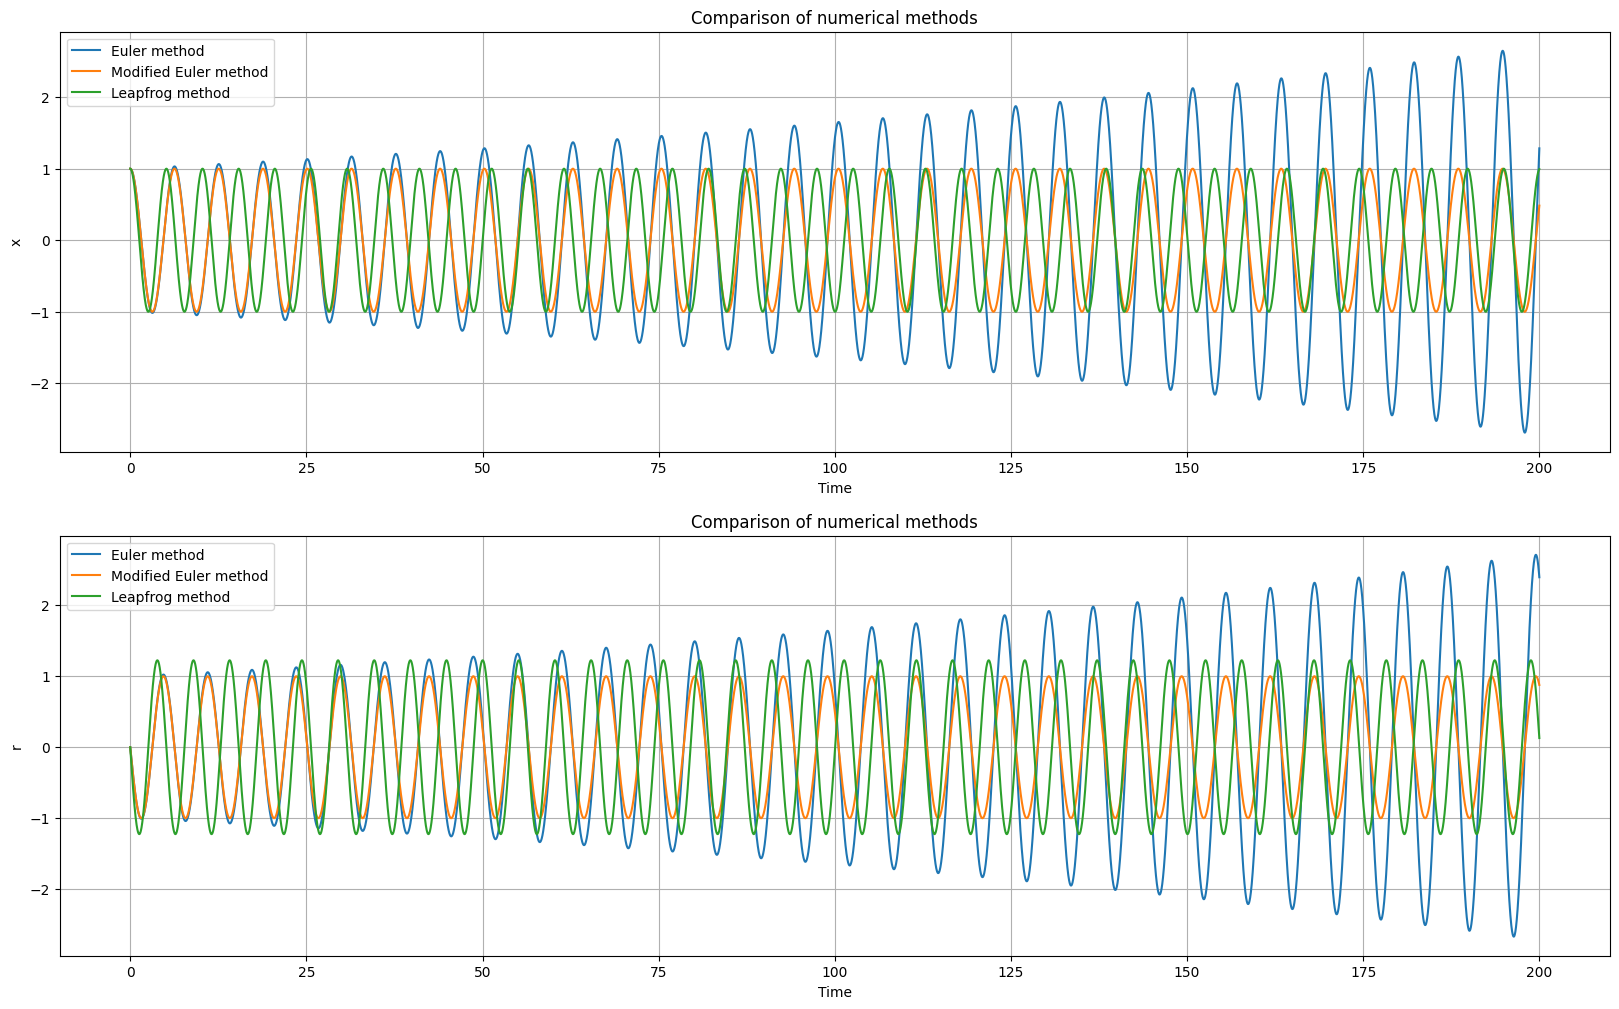

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def euler(x0, r0, eps, N):
    x_list = [x0]
    r_list = [r0]
    for i in range(1, N):
        r_list.append(r_list[i-1] - eps * x_list[i-1])
        x_list.append(x_list[i-1] + eps * r_list[i-1])
    return x_list, r_list

def modified_euler(x0, r0, eps, N):
    x_list = [x0]
    r_list = [r0]
    for i in range(1, N):
        r_list.append(r_list[i-1] - eps * x_list[i-1])
        x_list.append(x_list[i-1] + eps * r_list[i])
    return x_list, r_list

def leapfrog(x0, r0, eps, N):
    x_list = [x0]
    r_list = [r0]
    for i in range(1, N):
        r_half = r_list[i-1] - (eps/2) * x_list[i-1]
        x_list.append(x_list[i-1] + eps * r_half)
        r_list.append(r_half - eps * x_list[i])
    return x_list, r_list

# Parameters
eps = 1e-2
N = 20000

x0 = 1
r0 = 0

x_euler, r_euler = euler(x0, r0, eps, N)
x_mod_euler, r_mod_euler = modified_euler(x0, r0, eps, N)
x_leapfrog, r_leapfrog = leapfrog(x0, r0, eps, N)

# Plot
time = np.arange(0, eps * N, eps)

fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(time, x_euler, label='Euler method')
ax1.plot(time, x_mod_euler, label='Modified Euler method')
ax1.plot(time, x_leapfrog, label='Leapfrog method')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_ylabel('x')
ax1.set_title('Comparison of numerical methods')
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(time, r_euler, label='Euler method')
ax2.plot(time, r_mod_euler, label='Modified Euler method')
ax2.plot(time, r_leapfrog, label='Leapfrog method')
ax2.legend()
ax2.set_xlabel('Time')
ax2.set_ylabel('r')
ax2.set_title('Comparison of numerical methods')
ax2.grid(True)

plt.show()
